In [1]:
try: 
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    import pymc as pm # For MCMC
except:
    !pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    !pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    !pip install corner
    import corner

print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.15.0


In [2]:
def dfg(a,b):
    file_path = 'datasets/Donor%d_CD%d_Genes.csv' %(a,b)
    all_df = pd.read_csv(file_path)
    file_path = 'datasets/mt_genes_metadata.csv'
    dfmeta = pd.read_csv(file_path)
    protein_coding_genes = dfmeta[dfmeta['gene_type'] == 'protein_coding']
    protein_names = protein_coding_genes['gene_name'].tolist()
    df2 = pd.DataFrame([all_df[i] for i in protein_names]).T
    return df2

In [3]:
def normiz_2(df,s_n = 1000):
    df1 = df
    listfinal = [sum(df.iloc[i]) for i in range(len(df))]
    for i in range(len(df)):
        df1.iloc[i] = df1.iloc[i]/listfinal[i] * s_n
    return df1

In [4]:
def lse(a,b):
    x = g_log(normiz_2(dfg(a,b)))[0]
    y = g_log(normiz_2(dfg(a,b)))[1]

    X = np.vstack([np.ones(len(x)), x]).T
    # theta = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    a, b = theta
    print(f"Estimated parameters: a = {a}, b = {b}")

    y_pred = a + b * x

    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"R-squared (R^2) value: {r_squared}")

    plt.scatter(x, y, label='Observed data')
    plt.plot(x, y_pred, color='red', label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Least Squares Estimation')
    plt.legend()
    plt.show()

In [48]:
def lse_general(x,y):
    X = np.vstack([np.ones(len(x)), x]).T
    # theta = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    a, b = theta
    print(f"Estimated parameters: a = {a}, b = {b}")

    y_pred = a + b * x

    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"R-squared (R^2) value: {r_squared}")

    plt.scatter(x, y, label='Observed data')
    plt.plot(x, y_pred, color='red', label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Least Squares Estimation')
    plt.legend()
    plt.show()

In [5]:
def g_log(df_n):
    df_final = normiz_2(df_n).T
    gene_mean = [np.mean(df_final.iloc[i]) for i in range(13)]
    gene_var = [np.var(df_final.iloc[i]) for i in range(13)]
    log_gene_mean = np.log(gene_mean)
    log_gene_var = np.log(gene_var)
    return log_gene_mean, log_gene_var

def log_gene_plot(df_n):
    df_final = normiz_2(df_n).T
    gene_mean = [np.mean(df_final.iloc[i]) for i in range(13)]
    gene_var = [np.var(df_final.iloc[i]) for i in range(13)]
    log_gene_mean = np.log(gene_mean)
    log_gene_var = np.log(gene_var)
    plt.scatter(log_gene_mean,log_gene_var)

Estimated parameters: a = 1.9340102220340734, b = 1.0993566989318007
R-squared (R^2) value: 0.9670751161979677


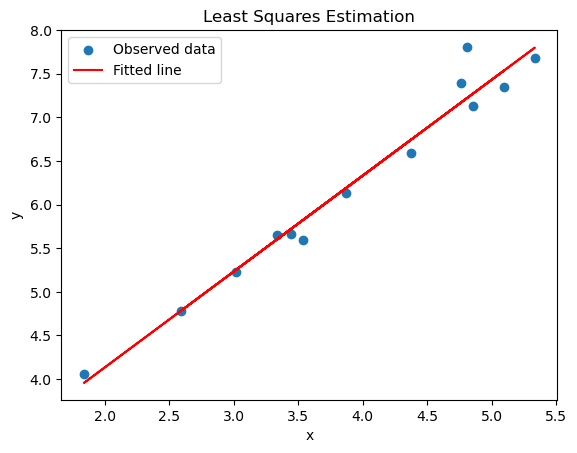

Estimated parameters: a = 2.71564094284695, b = 0.9203798659612552
R-squared (R^2) value: 0.9083683585262006


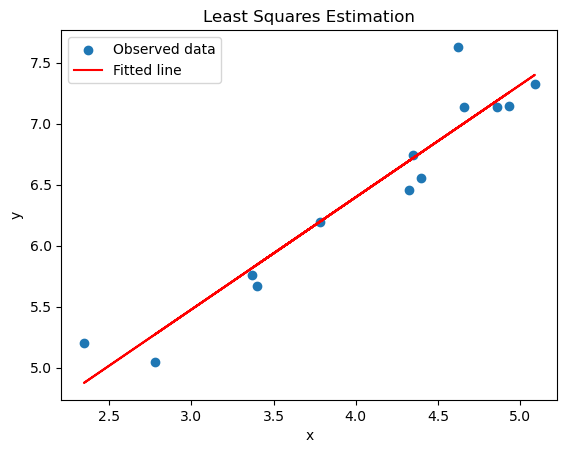

Estimated parameters: a = 1.6414409105513923, b = 1.1061489870280319
R-squared (R^2) value: 0.943518674975821


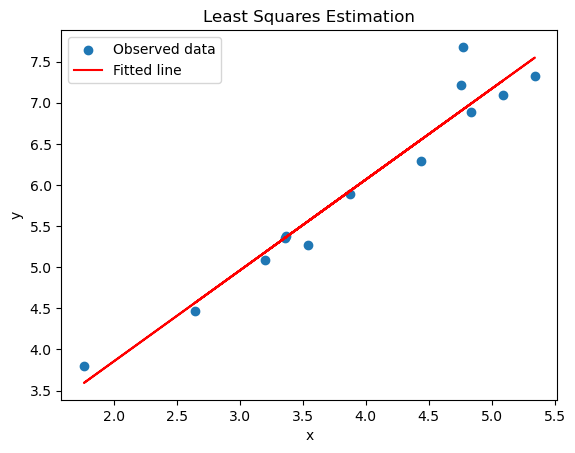

Estimated parameters: a = 2.169337034625318, b = 1.0196174509223594
R-squared (R^2) value: 0.8479417463804162


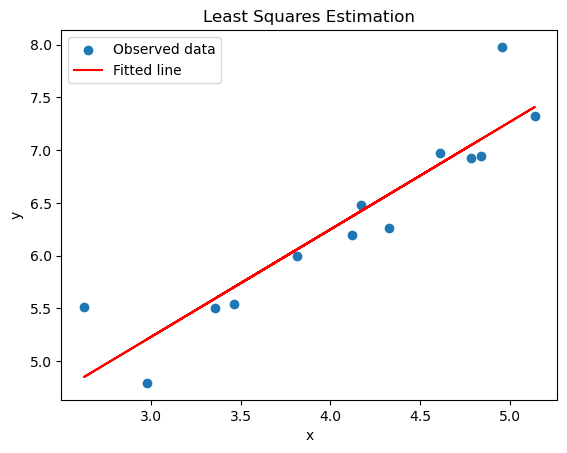

In [6]:
lse(1,4)
lse(2,4)
lse(1,8)
lse(2,8)


In [7]:
import scipy.stats as sd

In [8]:
normiz_2(dfg(1,4))

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,51.948052,12.987013,99.567100,229.437229,147.186147,12.987013,164.502165,25.974026,86.580087,21.645022,30.303030,30.303030,86.580087
1,48.192771,24.096386,144.578313,210.843373,60.240964,12.048193,204.819277,18.072289,90.361446,42.168675,36.144578,6.024096,102.409639
2,52.238806,14.925373,119.402985,223.880597,59.701493,7.462687,141.791045,44.776119,149.253731,22.388060,52.238806,0.000000,111.940299
3,21.897810,14.598540,182.481752,167.883212,102.189781,36.496350,167.883212,14.598540,94.890511,29.197080,43.795620,21.897810,102.189781
4,63.829787,31.914894,63.829787,276.595745,148.936170,10.638298,117.021277,42.553191,148.936170,0.000000,21.276596,0.000000,74.468085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,50.000000,0.000000,250.000000,187.500000,137.500000,37.500000,137.500000,25.000000,62.500000,25.000000,37.500000,0.000000,50.000000
2884,17.699115,44.247788,115.044248,247.787611,106.194690,17.699115,159.292035,53.097345,123.893805,17.699115,17.699115,8.849558,70.796460
2885,46.296296,0.000000,92.592593,203.703704,120.370370,9.259259,129.629630,37.037037,55.555556,64.814815,46.296296,9.259259,185.185185
2886,25.316456,50.632911,151.898734,189.873418,80.168776,8.438819,168.776371,21.097046,84.388186,33.755274,29.535865,0.000000,156.118143


In [9]:
dfg(1,4)

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,12,3,23,53,34,3,38,6,20,5,7,7,20
1,8,4,24,35,10,2,34,3,15,7,6,1,17
2,7,2,16,30,8,1,19,6,20,3,7,0,15
3,3,2,25,23,14,5,23,2,13,4,6,3,14
4,6,3,6,26,14,1,11,4,14,0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,4,0,20,15,11,3,11,2,5,2,3,0,4
2884,2,5,13,28,12,2,18,6,14,2,2,1,8
2885,5,0,10,22,13,1,14,4,6,7,5,1,20
2886,6,12,36,45,19,2,40,5,20,8,7,0,37


In [10]:
sum(dfg(1,4).iloc[0]) 

231

In [11]:
x = g_log(normiz_2(dfg(1,4)))[0]
y = g_log(normiz_2(dfg(1,4)))[1]
tri = sd.linregress(x,y)

In [12]:
tri

LinregressResult(slope=1.0993566989318044, intercept=1.934010222034054, rvalue=0.9833997743532218, pvalue=1.6745917494404568e-09, stderr=0.06116096170544074, intercept_stderr=0.2473369843767211)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def clu_df(a,b,num = 3):
    genes = dfg(a,b)
    data = dfg(a,b)

    # Normalize the data
    scaler = StandardScaler()
    genes_normalized = scaler.fit_transform(genes)

    # Set the number of clusters
    k = num

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genes_normalized)

    # Add cluster labels to the original DataFrame
    data['Cluster'] = kmeans.labels_

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(genes_normalized)

    # Create a DataFrame with PCA components and cluster labels
    pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = data['Cluster']

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
    plt.title('K-means Clustering of 13 Protein RNA Genes')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()
    return data

c:\Users\ruizc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


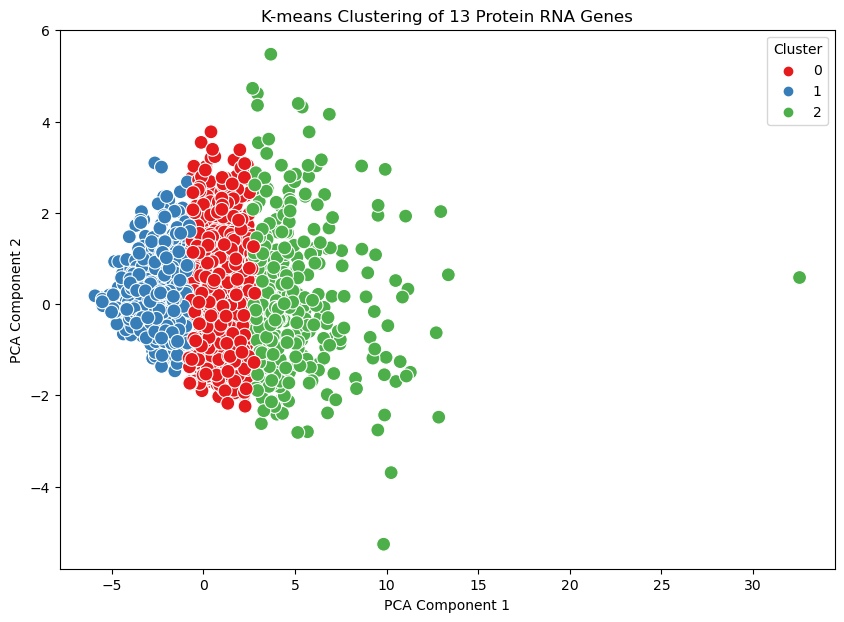

      MT-ND1  MT-ND2  MT-CO1  MT-CO2  MT-ATP8  MT-ATP6  MT-CO3  MT-ND3  \
0         12       3      23      53       34        3      38       6   
1          8       4      24      35       10        2      34       3   
2          7       2      16      30        8        1      19       6   
3          3       2      25      23       14        5      23       2   
4          6       3       6      26       14        1      11       4   
...      ...     ...     ...     ...      ...      ...     ...     ...   
2883       4       0      20      15       11        3      11       2   
2884       2       5      13      28       12        2      18       6   
2885       5       0      10      22       13        1      14       4   
2886       6      12      36      45       19        2      40       5   
2887       7       1       9      24       11        0      22       1   

      MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  Cluster  
0          20       5       7       7      20        2

In [16]:
print(clu_df(1,4))

In [43]:
def clu_norm_iz(dfc):
    df = dfc
    max_c = max(df["Cluster"])+1
    clus = []
    for i in range(max_c):
        clus.append(df[df["Cluster"] == i])
        del clus[i]["Cluster"]
        clus[i] = normiz_2(clus[i],np.sum(clus[i]))
    final = pd.concat(clus)
    final = final.sort_index()
    return final
    
    


c:\Users\ruizc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


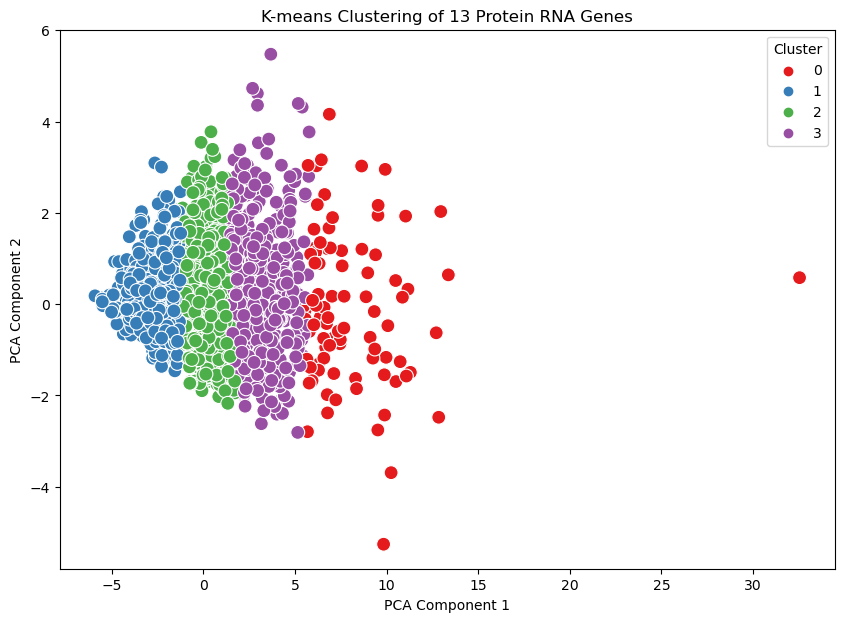

Estimated parameters: a = -0.15486146923445165, b = 1.5296122154362588
R-squared (R^2) value: 0.9934082596916771


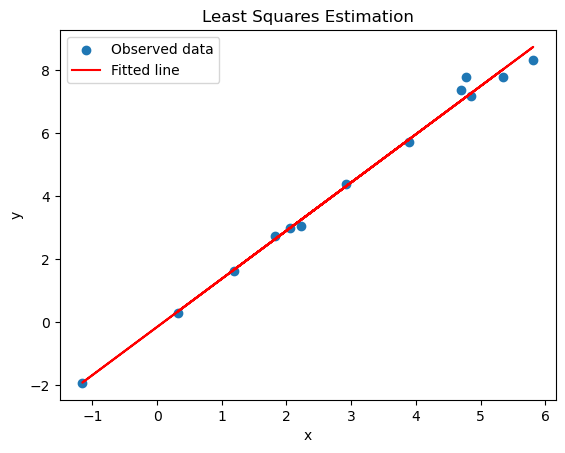

In [69]:
data_1 = clu_df(1,4,4)
final_data = clu_norm_iz(data_1)
x = g_log(final_data)[0]
y = g_log(final_data)[1]

lse_general(x,y)

Original DataFrame:
      MT-ND1  MT-ND2  MT-CO1  MT-CO2  MT-ATP8  MT-ATP6  MT-CO3  MT-ND3  \
0          4       7      22      29       24        2      22       9   
1         15      15      65      93       59        7      70      11   
2          8       7      19      20       12        0      20       8   
3         11       5      23      32       23        4      40      10   
4          2       1      11      10        2        1       4       0   
...      ...     ...     ...     ...      ...      ...     ...     ...   
2086       1       1      22      28        8        2      25       3   
2087       8       7      12      24       14        2      35       6   
2088      29      16      37      86       48        8      59      16   
2089       7       9      16      42       21        3      31       2   
2090      16      15      49      88       35        4      67      16   

      MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  
0          13       5       4       1      

c:\Users\ruizc\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\ruizc\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


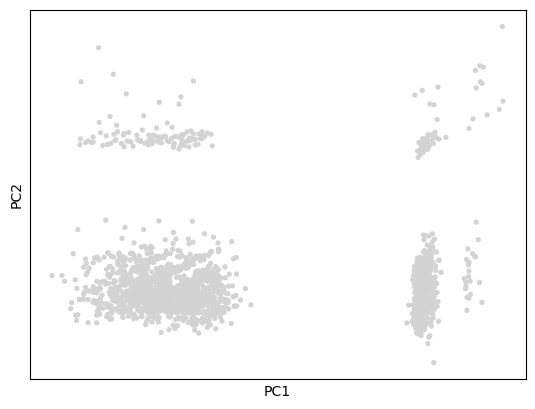

KeyError: 'No "neighbors" in .uns'

In [66]:
import pandas as pd
import scanpy as sc
from anndata import AnnData

# Example DataFrame with genes as columns and cells as rows
data = dfg(1,8)
df = data

print("Original DataFrame:")
print(df)

# Convert DataFrame to AnnData object
adata = AnnData(df)
print("\nAnnData object:")
print(adata)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
print("\nNormalized AnnData object:")
print(adata)

# Perform PCA
sc.tl.pca(adata)
sc.pl.pca(adata)

# Find clusters using the Louvain algorithm
sc.tl.louvain(adata)
sc.pl.louvain(adata, color='louvain')

# Print clusters
print("\nClusters:")
print(adata.obs['louvain'])


Estimated parameters: a = 17.865482510300872, b = -3.070347316845952
R-squared (R^2) value: 0.9257626007496463


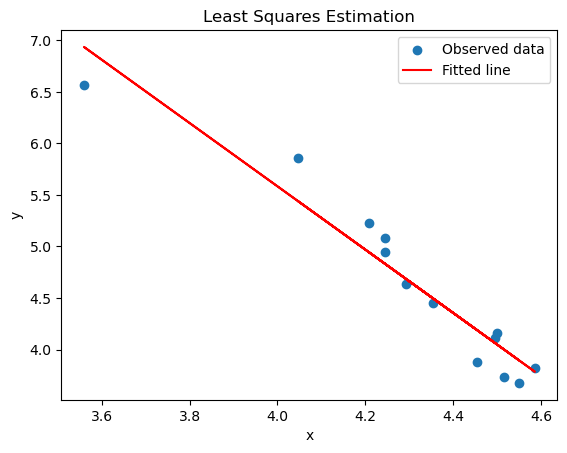

In [67]:
adata1 = pd.DataFrame(adata.X)
x = g_log(adata1)[0]
y = g_log(adata1)[1]
lse_general(x,y)

In [29]:
df = data_1
clus = []
for i in range(3):
        clus.append(df[df["Cluster"] == i])
        del clus[i]["Cluster"]
        clus[i] = normiz_2(clus[i])
clus
  

[         MT-ND1     MT-ND2      MT-CO1      MT-CO2     MT-ATP8    MT-ATP6  \
 1     48.192771  24.096386  144.578313  210.843373   60.240964  12.048193   
 3     21.897810  14.598540  182.481752  167.883212  102.189781  36.496350   
 5     27.888446   3.984064  171.314741  211.155378   71.713147  15.936255   
 9     41.666667  17.857143   95.238095  184.523810  172.619048   5.952381   
 12    40.540541  40.540541   47.297297  216.216216  182.432432   0.000000   
 ...         ...        ...         ...         ...         ...        ...   
 2875  60.000000  40.000000  106.666667  240.000000  120.000000  13.333333   
 2877  42.918455  21.459227  137.339056  158.798283  128.755365   8.583691   
 2881  34.965035  13.986014   69.930070  202.797203  104.895105   6.993007   
 2882  68.181818  17.045455  113.636364  181.818182  164.772727   5.681818   
 2886  25.316456  50.632911  151.898734  189.873418   80.168776   8.438819   
 
           MT-CO3     MT-ND3    MT-ND4L     MT-ND4     MT-ND5 

In [34]:
clus[1]

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
2,52.238806,14.925373,119.402985,223.880597,59.701493,7.462687,141.791045,44.776119,149.253731,22.388060,52.238806,0.000000,111.940299
4,63.829787,31.914894,63.829787,276.595745,148.936170,10.638298,117.021277,42.553191,148.936170,0.000000,21.276596,0.000000,74.468085
6,57.971014,14.492754,231.884058,246.376812,0.000000,14.492754,144.927536,14.492754,115.942029,14.492754,43.478261,0.000000,101.449275
7,61.538462,23.076923,169.230769,200.000000,92.307692,0.000000,146.153846,30.769231,76.923077,38.461538,23.076923,7.692308,130.769231
8,14.925373,44.776119,268.656716,179.104478,44.776119,0.000000,223.880597,14.925373,14.925373,44.776119,29.850746,14.925373,104.477612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,45.454545,27.272727,90.909091,227.272727,136.363636,9.090909,154.545455,27.272727,72.727273,18.181818,18.181818,18.181818,154.545455
2883,50.000000,0.000000,250.000000,187.500000,137.500000,37.500000,137.500000,25.000000,62.500000,25.000000,37.500000,0.000000,50.000000
2884,17.699115,44.247788,115.044248,247.787611,106.194690,17.699115,159.292035,53.097345,123.893805,17.699115,17.699115,8.849558,70.796460
2885,46.296296,0.000000,92.592593,203.703704,120.370370,9.259259,129.629630,37.037037,55.555556,64.814815,46.296296,9.259259,185.185185


In [31]:
final = pd.concat(clus)

In [33]:
final.sort_index()

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,51.948052,12.987013,99.567100,229.437229,147.186147,12.987013,164.502165,25.974026,86.580087,21.645022,30.303030,30.303030,86.580087
1,48.192771,24.096386,144.578313,210.843373,60.240964,12.048193,204.819277,18.072289,90.361446,42.168675,36.144578,6.024096,102.409639
2,52.238806,14.925373,119.402985,223.880597,59.701493,7.462687,141.791045,44.776119,149.253731,22.388060,52.238806,0.000000,111.940299
3,21.897810,14.598540,182.481752,167.883212,102.189781,36.496350,167.883212,14.598540,94.890511,29.197080,43.795620,21.897810,102.189781
4,63.829787,31.914894,63.829787,276.595745,148.936170,10.638298,117.021277,42.553191,148.936170,0.000000,21.276596,0.000000,74.468085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,50.000000,0.000000,250.000000,187.500000,137.500000,37.500000,137.500000,25.000000,62.500000,25.000000,37.500000,0.000000,50.000000
2884,17.699115,44.247788,115.044248,247.787611,106.194690,17.699115,159.292035,53.097345,123.893805,17.699115,17.699115,8.849558,70.796460
2885,46.296296,0.000000,92.592593,203.703704,120.370370,9.259259,129.629630,37.037037,55.555556,64.814815,46.296296,9.259259,185.185185
2886,25.316456,50.632911,151.898734,189.873418,80.168776,8.438819,168.776371,21.097046,84.388186,33.755274,29.535865,0.000000,156.118143
